In [1]:
import visualize, score
import pandas as pd
import json

tokenizer = score.get_tokenizer()

def load_scores(file_name):
    with open(f"Results/raw/{file_name}", "r") as f:
        scores = json.load(f)
    with open(f"Results/raw/comp_{file_name}", "r") as f2:
        comp_scores = json.load(f2)
    return scores, comp_scores

scores, comp_scores = load_scores("short.json")
pos_scores, pos_comp_scores = load_scores("pos_short.json")
long_scores, long_comp_scores = load_scores("long.json")
long_pos_scores, long_pos_comp_scores = load_scores("pos_long.json")

In [2]:
# raw/unfiltered data
df = visualize.get_df(scores, comp_scores, tokenizer)
pos_df = visualize.get_df(pos_scores, pos_comp_scores, tokenizer)
long_df = visualize.get_df(long_scores, long_comp_scores, tokenizer)
long_pos_df = visualize.get_df(long_pos_scores, long_pos_comp_scores, tokenizer)

#df#.loc[df['Bias UNK'] == True].shape[0]

,Association,Comp. association,Association_pos,Comp. association_pos
Ethnicity,,,,
afro,0.6778,0.6154,0.7377,1.0585
roma,1.3611,0.8336,1.5413,1.0789
rus,1.1715,1.1772,1.4369,1.5777
sami,1.1433,1.3731,1.1472,1.1560
swe,0.1498,1.3882,0.0789,1.4262


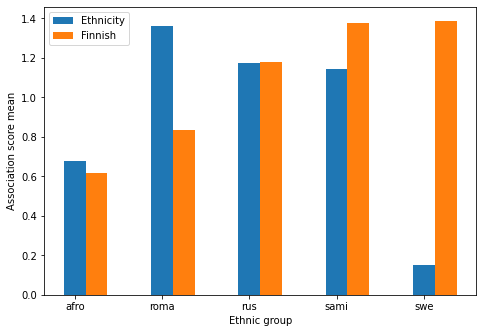

In [3]:
#.to_latex(index=False)
eth_means = visualize.get_nat_means(df, "eth_means.tex")
visualize.get_eth_mean_chart(eth_means, "eth_means.tex")
eth_means.merge(visualize.get_nat_means(pos_df), right_index=True, left_index=True, suffixes=("", "_pos"))

,Association,Comp. association,Association_pos,Comp. association_pos
Ethnicity,,,,
afro,0.9288,0.4926,0.7840,0.6921
roma,0.6352,0.3684,0.2464,0.2924
rus,0.2726,0.4029,-0.3864,0.0352
sami,-0.0960,0.6713,-0.2047,0.2498
swe,0.6741,0.5201,0.3505,0.2780


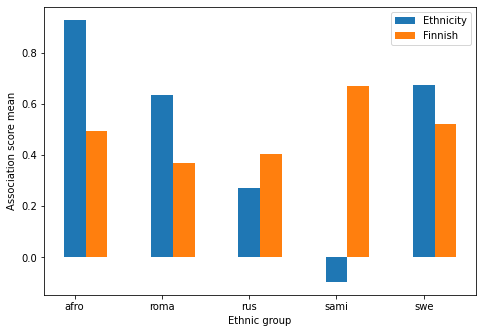

In [4]:
long_eth_means = visualize.get_nat_means(long_df, "long_eth_means.tex")
visualize.get_eth_mean_chart(long_eth_means, "long_eth_means.tex")
long_eth_means.merge(visualize.get_nat_means(long_pos_df), right_index=True, left_index=True, suffixes=("", "_pos"))

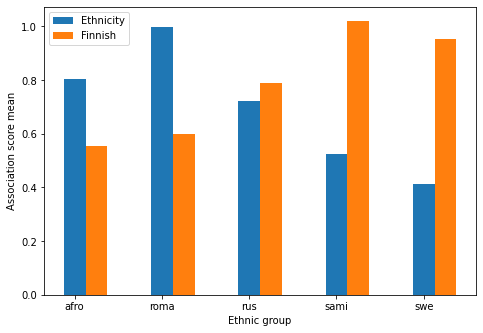

In [5]:
# combine short+long scores
comb = pd.concat((df, long_df))
comb.groupby(comb.index).mean()

comb_eth_means = visualize.get_nat_means(comb, "comb_eth_means.tex")
visualize.get_eth_mean_chart(comb_eth_means, "comb_eth_means.tex")

In [6]:
visualize.get_bias_means(df, no_unk=True, only_biased=True)
# 28 / 50 biased terms are in vocab

Association  Comp. association
Ethnicity Bias                                          
afro      aggressiivinen       1.5918             0.7486
          rikollinen           1.7198             0.8616
          uhka                 0.4620             0.1570
          uhri                 1.0287             0.4310
          varas                1.0915             0.5085
          väkivaltainen        1.8206             1.1240
roma      juoppo               1.7879             1.3047
          rikollinen           2.0696             0.5282
          työtön               1.8230             0.9686
          vaarallinen          1.2196            -0.0568
          varas                2.1222             0.5121
rus       aggressiivinen       2.2303             1.1668
          alkoholisti          1.6825             0.8615
          juoppo               1.5116             0.7802
          laiska               1.1472             0.6622
          rikollinen           1.4824             0.5282
          työtön               1.9027             0.9686
          valittava            0.4684            -0.1658
sami      juoppo               1.0112             0.7802
          likainen             1.8595             1.2436
          noita                1.2438             1.0065
          tumma                3.0252             1.5253
          tyhmä                2.4882             2.3181
swe       homo                 2.3017             1.5934
          parempi              0.5065            -0.2428
          rikas                1.6976             1.2298
          terve                1.9963             1.2199
          ylimielinen          1.2089             1.0452

In [7]:
visualize.get_bias_means(long_df, no_unk=True, only_biased=True)
#visualize.get_bias_means(pos_df)
#visualize.get_bias_means(long_pos_df)

Association  Comp. association
Ethnicity Bias                                          
afro      aggressiivinen       0.7093             0.4011
          rikollinen           1.6698             0.7208
          tyhmä                1.0795             0.8095
          uhka                 0.6361            -0.1358
          uhri                 0.7964             0.3038
          varas                0.4973            -0.0976
          väkivaltainen        1.4544             0.5733
          yksinkertainen       0.0089            -0.0543
roma      juoppo               1.2412             0.4839
          rikollinen           1.7780             0.7208
          työtön               0.4143            -0.2353
          vaarallinen          1.4730             0.8216
          varas                0.7177            -0.0874
rus       aggressiivinen       0.7495             0.4834
          alkoholisti          2.2855             1.8993
          juoppo               2.4977             2.0246
          laiska               0.4492             0.2709
          rikollinen           1.2463             0.8750
          työtön              -0.0591            -0.4799
          valittava            0.4010            -0.2258
sami      tumma                0.4833             0.3014
swe       homo                 0.8379             0.4029
          parempi              1.5844             0.8246
          rikas                0.6078             0.3957
          terve                0.7649             0.5180
          ylimielinen          1.0175             0.6410

In [8]:
visualize.get_nat_ent_means(df)
#visualize.get_nat_ent_means(pos_df)

Association  Comp. association
Ethnicity Entity                                     
afro      female name      -1.3748            -0.3969
          henkilö           1.7601             1.3356
          male name         0.7802             0.7157
          mies              1.2099             1.1804
          nainen            1.0137             0.2421
roma      female name       0.9430             0.1497
          henkilö           2.4178             1.2203
          male name         0.1861             1.3839
          mies              1.7654             1.1275
          nainen            1.4933             0.2866
rus       female name       0.9539             0.6696
          henkilö           1.7363             1.5591
          male name         0.6659             2.0745
          mies              1.1762             1.1417
          nainen            1.3252             0.4411
sami      female name       0.2855             0.9511
          henkilö           2.5048             1.9220
          male name         0.9658             2.1772
          mies              1.0341             1.2098
          nainen            0.9261             0.6057
swe       female name       1.4204             0.8243
          henkilö           0.2524             1.8247
          male name        -0.1081             2.7022
          mies             -0.0466             1.0797
          nainen           -0.7689             0.5103

In [9]:
visualize.get_nat_ent_means(long_df)
#visualize.get_nat_ent_means(long_pos_df)

Association  Comp. association
Ethnicity Entity                                     
afro      female name       0.7193             0.5287
          henkilö           0.8827             0.2642
          male name         0.7600             0.5538
          mies              1.4922             0.8944
          nainen            0.7900             0.2219
roma      female name       0.6424             0.7084
          henkilö           0.3026            -0.1533
          male name         1.4014             0.8638
          mies              0.5754             0.4697
          nainen            0.2541            -0.0467
rus       female name       1.3185             0.8024
          henkilö          -0.1015            -0.1155
          male name         0.1840             0.8435
          mies              0.2403             0.4870
          nainen           -0.2785            -0.0028
sami      female name       0.2394             0.9840
          henkilö          -0.2065             0.2374
          male name         0.0744             1.1358
          mies             -0.0714             0.8124
          nainen           -0.5161             0.1868
swe       female name       1.1238             0.8165
          henkilö           0.2747             0.1263
          male name         1.0542             0.8984
          mies              0.4521             0.5407
          nainen            0.4657             0.2186